Note the relevant vars are 'bf_per_wi_', which is short for 'buffer percent within 100 m'.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from sklearn import preprocessing
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from osgeo import ogr

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 2.2 MB/s 
     |████████████████████████████████| 16.7 MB 54.3 MB/s 
     |████████████████████████████████| 6.3 MB 35.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# load data
df_orig = pd. read_excel('/content/drive/Othercomputers/My Computer (1)/F:/PAD2019/MichelaSavignano/simplified_CH4_100m.xlsx')
gdf = gpd.read_file('/content/drive/Othercomputers/My Computer (1)/F:/EngramAboveSAR_Methane_Ebullition_AK_1790/SAR_Methane_Ebullition_AK_1790/edk_out/SAR_ebulition_cmb_fix_buff_attr.shp')

In [ ]:
gdf.head()

,ID,AreaSqkm,BUFF_DIST,N_scenes,SAR_allYrs,SE_SARall,SAR_eFlux,SE_SAReFlx,Prcnt_CH4,MassFlxCH4,...,SE_2007b,layer,path,og_area,og_perimet,LAKEID,bf_area_of,bf_perimet,bf_per_wi_,geometry
0,3448,0.203150,-18.0,1.0,0.016386,0.000662,0.0,0.00262,0.43,0.0,...,NaN,atqasuk,F:/EngramAboveSAR_Methane_Ebullition_AK_1790/S...,2.033018e+05,8777.270901,atqasuk3448,463545.969238,13296.525612,69.529,"POLYGON ((-141645.028 2307883.057, -141650.289..."
1,3451,0.020779,-18.0,1.0,0.009853,0.002434,0.0,0.00262,0.43,0.0,...,NaN,atqasuk,F:/EngramAboveSAR_Methane_Ebullition_AK_1790/S...,2.079473e+04,1073.805496,atqasuk3451,108214.113892,2644.539124,83.891,"MULTIPOLYGON (((-140383.961 2308911.153, -1403..."
2,3459,3.114470,-18.0,1.0,0.013625,0.000202,0.0,0.00262,0.43,0.0,...,NaN,atqasuk,F:/EngramAboveSAR_Methane_Ebullition_AK_1790/S...,3.116777e+06,12506.082066,atqasuk3459,896097.865509,21149.239570,22.343,"POLYGON ((-137760.158 2309370.639, -137760.036..."
3,3468,0.035885,-18.0,1.0,0.016104,0.001035,0.0,0.00262,0.43,0.0,...,NaN,atqasuk,F:/EngramAboveSAR_Methane_Ebullition_AK_1790/S...,3.591120e+04,1226.622314,atqasuk3468,117695.279755,2670.232398,76.634,"POLYGON ((-136264.547 2309814.605, -136259.442..."
4,3469,1.850812,-18.0,1.0,0.009509,0.000127,0.0,0.00262,0.43,0.0,...,NaN,atqasuk,F:/EngramAboveSAR_Methane_Ebullition_AK_1790/S...,1.852172e+06,7576.910837,atqasuk3469,611472.696838,13763.085611,24.834,"POLYGON ((-135049.627 2309841.952, -135049.384..."


In [ ]:
df_orig.columns


Index(['LAKEID', 'Location', 'SAR_eFlux', 'MassFlxCH4', 'AreaSqkm',
       'perimeter', 'depth_avg', 'pfrst_mean', 'p_e', 'lbf_100n',
       'barren_100n', 'bog_100n', 'decid_100n', 'evrgrn_100n', 'fen_100n',
       'herb_100n', 'littoral_100n', 'shrub_100n', 'sparseveg_100n', 'Tavg_w',
       'Tavg_yr', 'precip_yr', 'SOC', 'greenness'],
      dtype='object')

## Preprocess

In [ ]:
gdf.dropna(subset=['AreaSqkm', 'bf_per_wi_'], inplace=True)

In [ ]:
## Calc P:A ratio to see if buffer ratio is any better
gdf['P_A_ratio'] = gdf.og_perimet / gdf.og_area

In [ ]:
gdf.columns

Index(['ID', 'AreaSqkm', 'BUFF_DIST', 'N_scenes', 'SAR_allYrs', 'SE_SARall',
       'SAR_eFlux', 'SE_SAReFlx', 'Prcnt_CH4', 'MassFlxCH4', 'SE_MassFlx',
       'COUNT_2009', 'MEAN_2009', 'SE_2009', 'COUNT_2008', 'MEAN_2008',
       'SE_2008', 'COUNT_2010', 'MEAN_2010', 'SE_2010', 'Lake_Type',
       'COUNT_2007', 'MEAN_2007', 'SE_2007', 'COUNT2007a', 'MEAN_2007a',
       'SE_2007a', 'COUNT2007b', 'MEAN_2007b', 'SE_2007b', 'layer', 'path',
       'og_area', 'og_perimet', 'LAKEID', 'bf_area_of', 'bf_perimet',
       'bf_per_wi_', 'geometry', 'P_A_ratio'],
      dtype='object')

## Plots

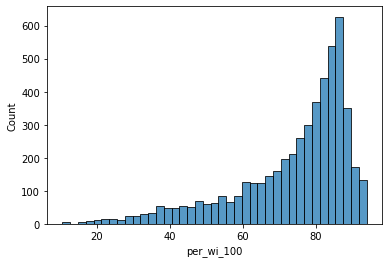

In [ ]:
## View my new variable of buffer percent
sns.histplot(gdf, x='bf_per_wi_')

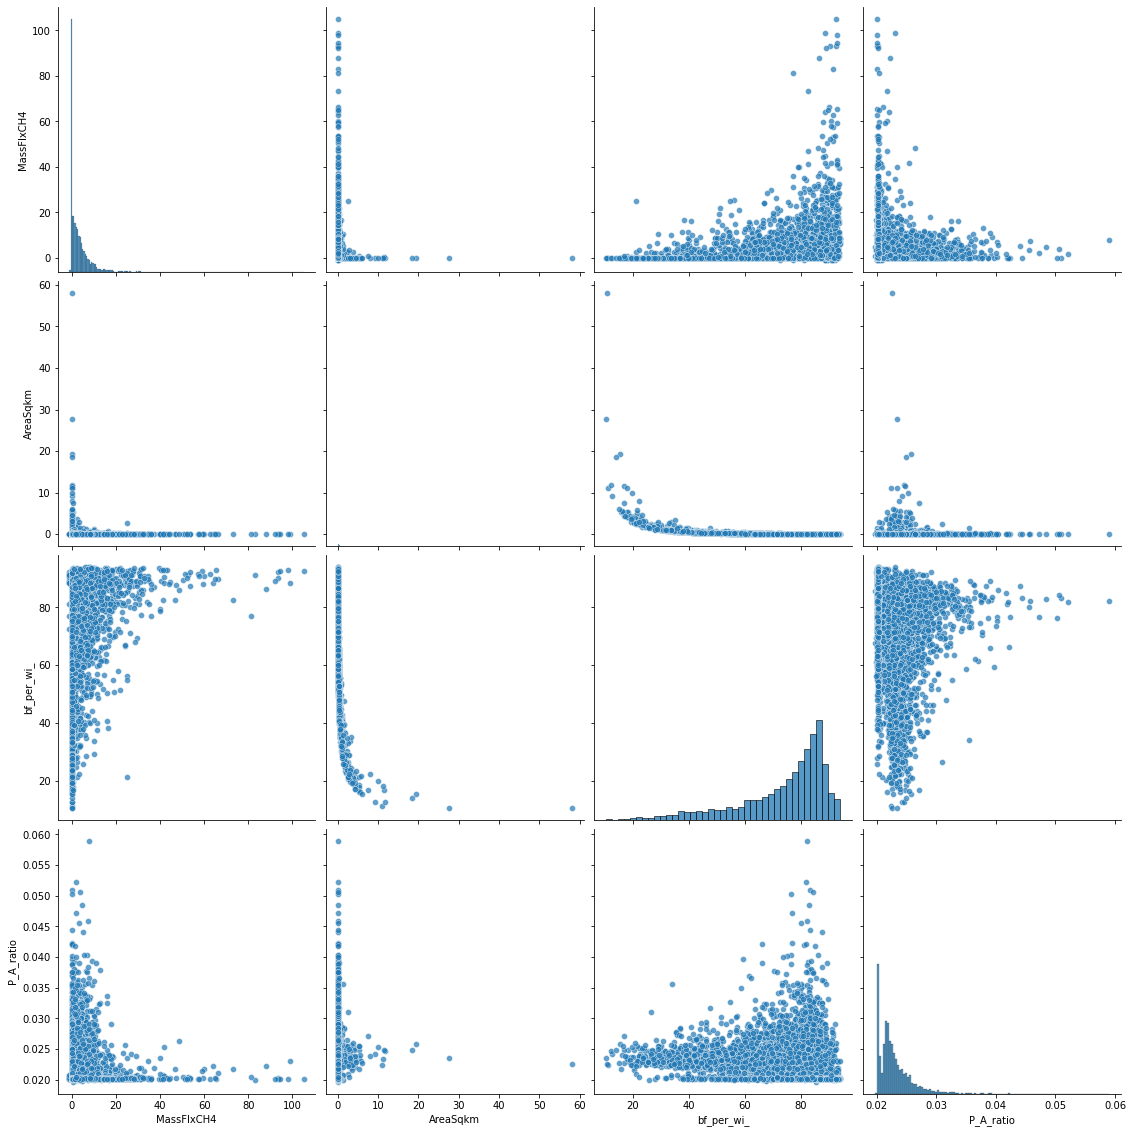

In [ ]:
# View its correlation with area
sns.pairplot(gdf, 
             x_vars=['MassFlxCH4', 'AreaSqkm', 'bf_per_wi_', 'P_A_ratio'],
             y_vars=['MassFlxCH4', 'AreaSqkm', 'bf_per_wi_', 'P_A_ratio'],
            height=4, aspect = 1, plot_kws={'alpha': 0.7})

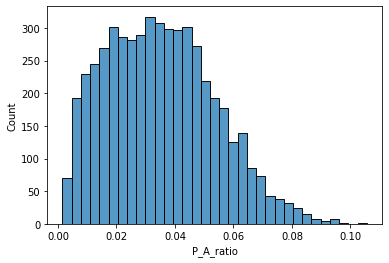

In [ ]:
## View my new variable of P/A ratio
sns.histplot(gdf, x='P_A_ratio')

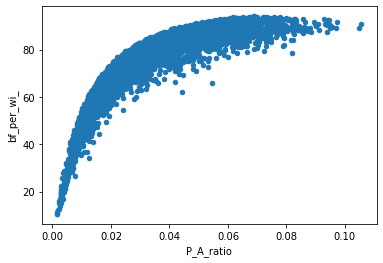

In [ ]:
## View buffer percent vs P/A ratio
gdf.plot.scatter(x='P_A_ratio', y='bf_per_wi_')

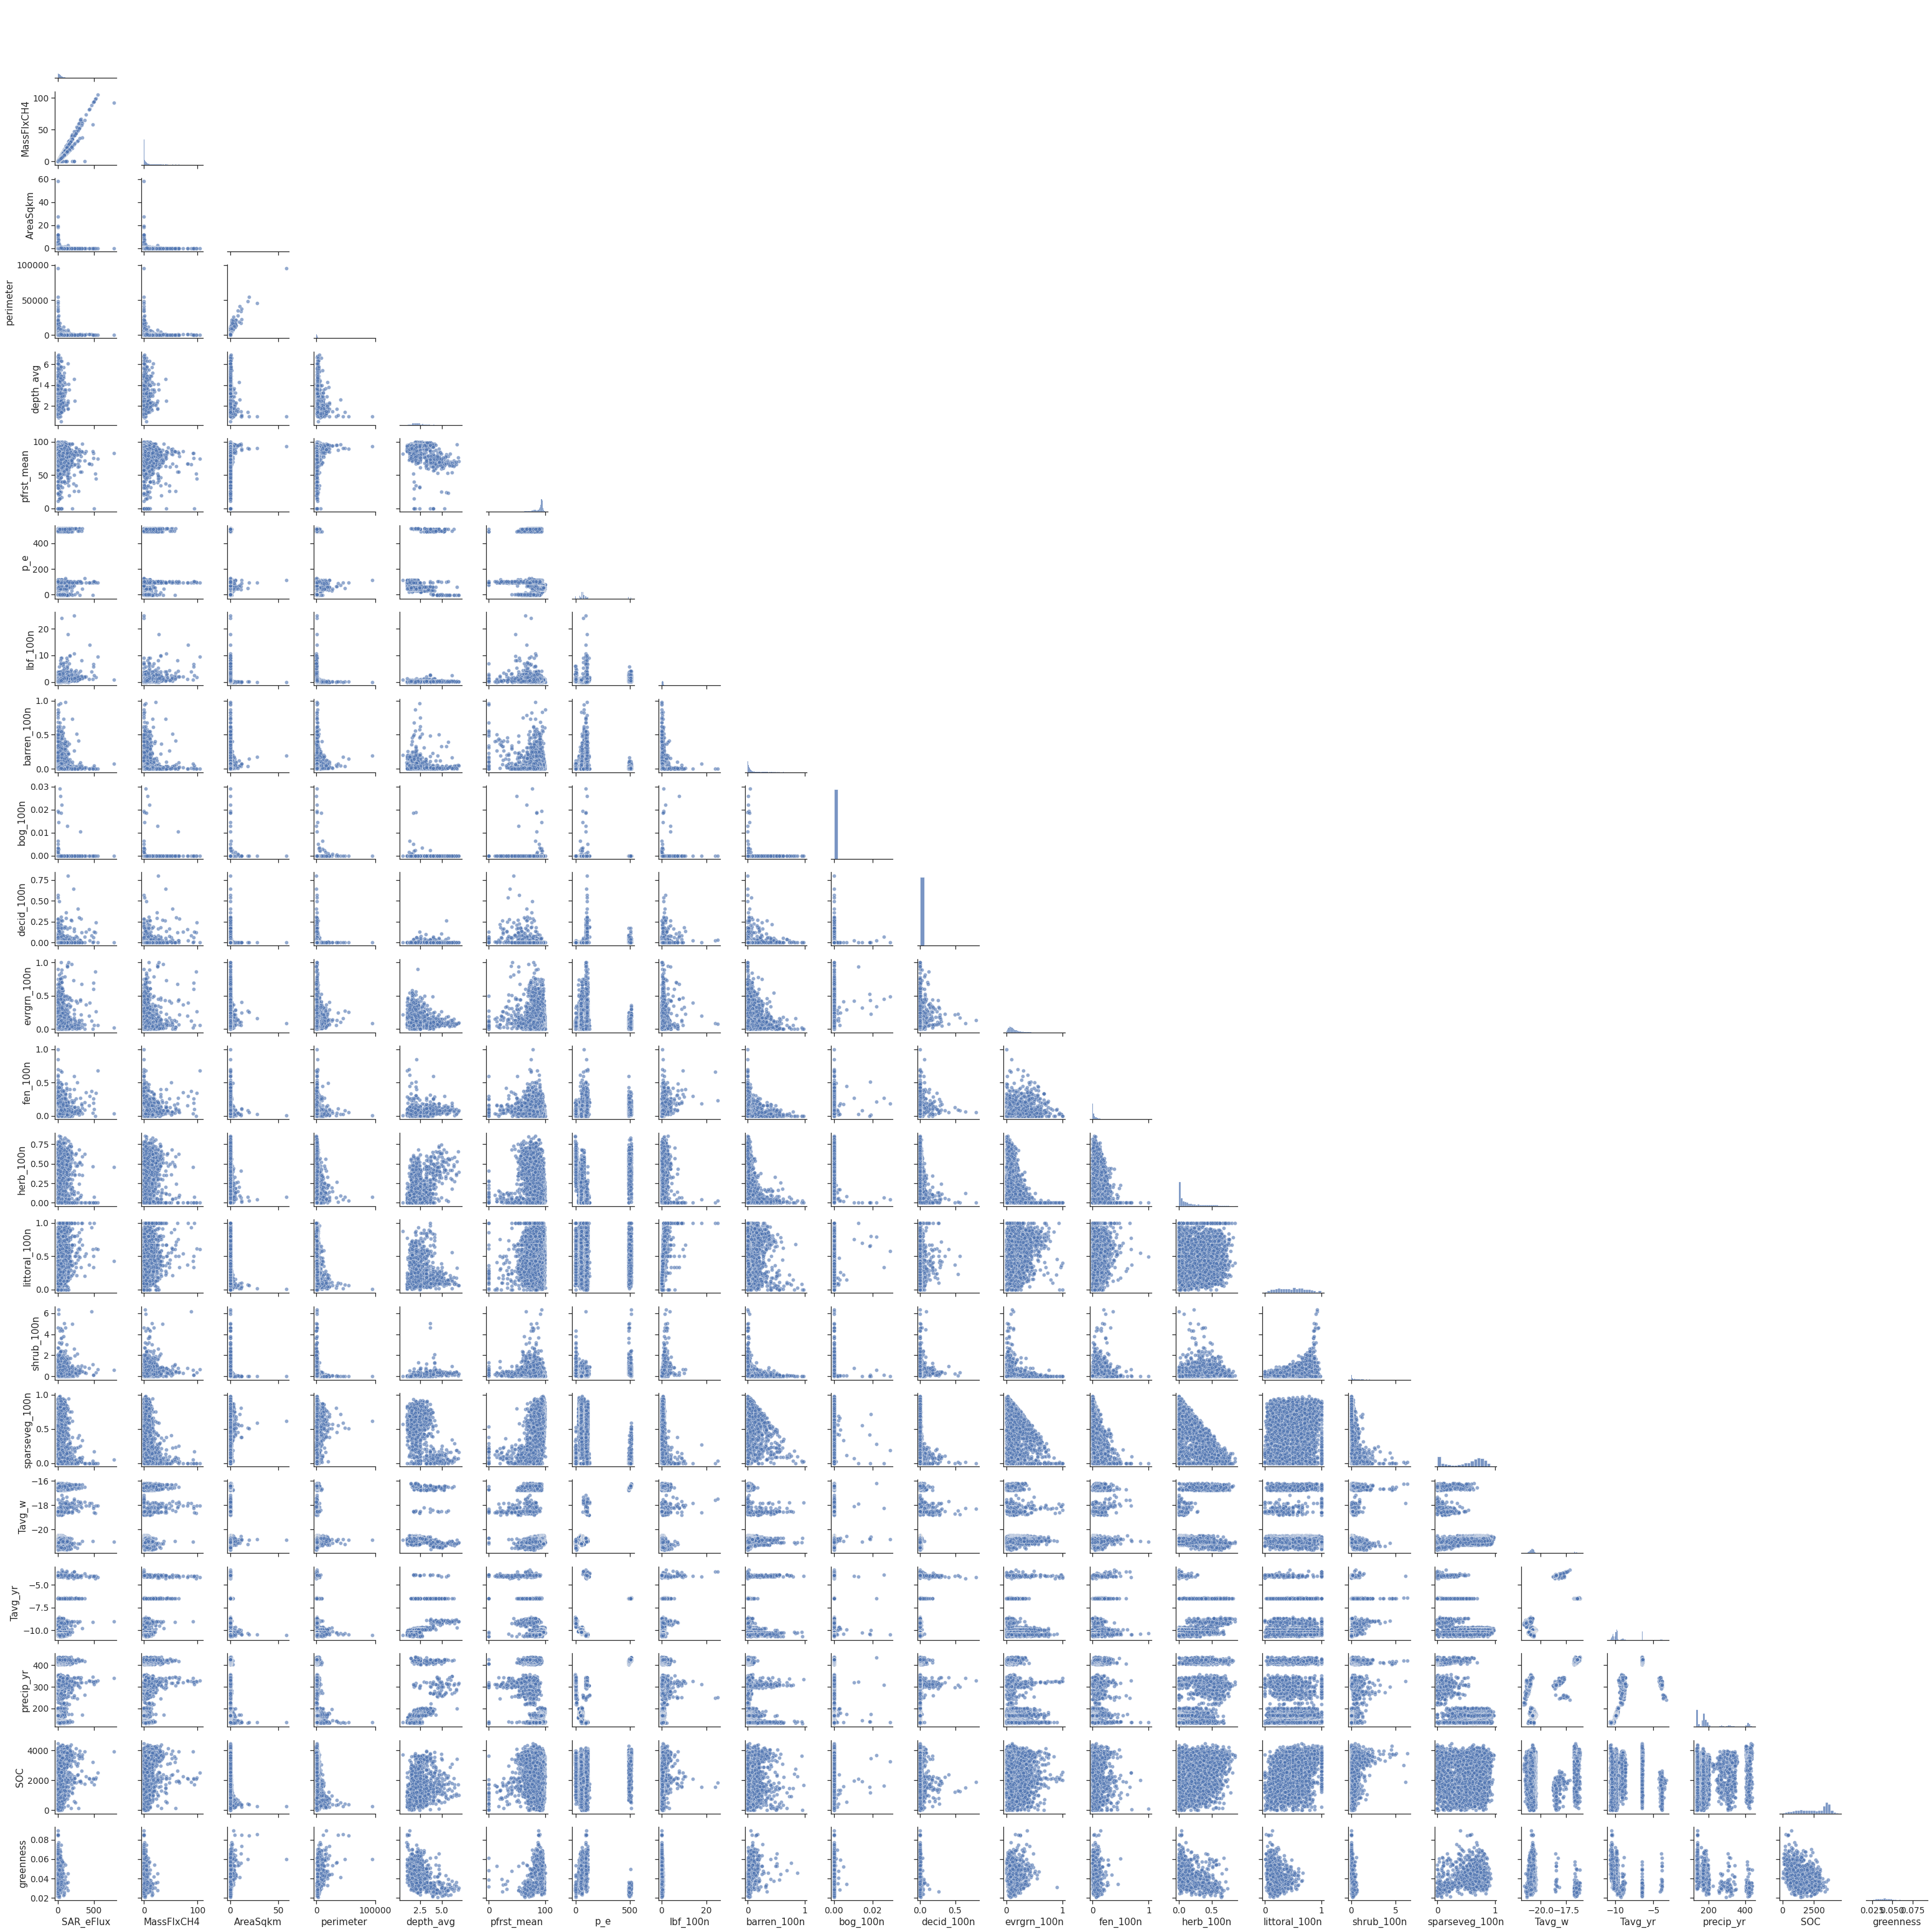

In [ ]:
## Plot selected vars with multiple facet rows
pair_vars = ['SAR_eFlux', 'MassFlxCH4', 'AreaSqkm',\
       'perimeter', 'depth_avg', 'pfrst_mean', 'p_e', 'lbf_100n',\
       'barren_100n', 'bog_100n', 'decid_100n', 'evrgrn_100n', 'fen_100n',\
       'herb_100n', 'littoral_100n', 'shrub_100n', 'sparseveg_100n', 'Tavg_w',\
       'Tavg_yr', 'precip_yr', 'SOC', 'greenness']
# pair_vars = ['MassFlxCH4', 'AreaSqkm']
sns.set_style("ticks")
# sns.set(font_scale=1.25) # 1.75
sns.set_context(font_scale=1.25)
sns.pairplot(df_orig, 
             x_vars=pair_vars,
             y_vars=pair_vars,
            height=2, aspect = 1, corner=True, plot_kws={'alpha': 0.6})
plt.savefig('/content/Pairplot10.jpg', dpi=400)
plt.savefig('/content/Pairplot10.pdf', dpi=400)

plt.show()

In [ ]:
# !cp /content/Pairplot* /content/drive/MyDrive
! ls /content/drive/MyDrive

'2019 660 Fieldwork'
'2020 660 Fieldwork'
 ABoVE
'ABoVE top level folder'
 Admin
 Adobe
'Anthropocene- Kyzivat- revised'
 Biographic
'Canvasback Lake 2021.gmap'
 Career
'CBL - YF - Fairbanks 2021.gmap'
 Classes
'Colab Notebooks'
'Colin PAD Photos'
 CommitteeMeeting
 Conference-notes
'Copy of SBFT 2022 Itinerary.gdoc'
'Custom Office Templates'
'DEEPS Chemistry Scientific Computing Workshop series, 2017-2018'
 DEEPS_letterhead
 Desktop
 Equity-diversity
 EthanKyzivatGROD
'Example CVs'
'Field Guide Itinerary.pdf'
'Field photos'
 fig1-4-5.zip
'GAN-project-scratch.pptx - Column chart 1.gsheet'
 GEO-CVD
 GIMP
'GIS DataBase'
'Graduate Council'
 Graphics
 Harvard_EPS_Colloquium_MethaneSATMethaneAIR_Poster.png
'JGR cover photo.gform'
 Kyzivat-ResarchMatters-Semifinals-2022.pptx
 Lab7Share
'Learning resources'
 Library
 MAIR_Stanford_comparison_20220509.pptx
'Manuscript Review'
 Misc
 NCCS
 Official
 Outreach
 Pairplot10-1.jpg
 Pairplot10-1.pdf
 Pairplot10.jpg
 Pairplot10.pdf
'Photo competition 

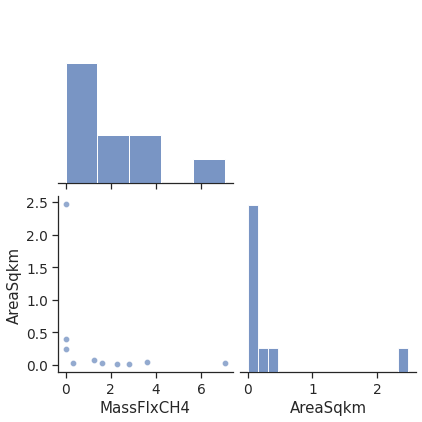

In [ ]:
## test Plot selected vars with multiple facet rows
# pair_vars = ['SAR_eFlux', 'MassFlxCH4', 'AreaSqkm',\
#        'perimeter', 'depth_avg', 'pfrst_mean', 'p_e', 'lbf_100n',\
#        'barren_100n', 'bog_100n', 'decid_100n', 'evrgrn_100n', 'fen_100n',\
#        'herb_100n', 'littoral_100n', 'shrub_100n', 'sparseveg_100n', 'Tavg_w',\
#        'Tavg_yr', 'precip_yr', 'SOC', 'greenness']
pair_vars = ['MassFlxCH4', 'AreaSqkm']
sns.set_style("ticks")
# sns.set(font_scale=1.25) # 1.75
sns.set_context(font_scale=1.25) #rc={'font.weight': 'bold'}):
sns.pairplot(df_orig.iloc[:10, :], 
            x_vars=pair_vars,
            y_vars=pair_vars,
            height=3, aspect = 1, corner=True, plot_kws={'alpha': 0.6})
# plt.savefig('/content/Pairplot10.jpg', dpi=400)
# plt.savefig('/content/Pairplot10.pdf', dpi=400)

plt.show()

## Calculate bias-corrected SDI

In [ ]:

## First, calc traditional SDI
gdf['D'] = gdf.og_perimet / (2 * (np.pi * gdf.og_area)**0.5)
print(f'Mean SDI: {gdf.D.mean():.2}')

Mean SDI: 1.7


In [ ]:
## Find fractal dimension by regressing
formula = 'np.log10(og_perimet) ~ np.log10(og_area)'
modelFractal = ols(formula=formula, data=gdf).fit()
d_2 = modelFractal.params[1]
modelFractal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log10(og_perimet)   R-squared:                       0.899
Model:                              OLS   Adj. R-squared:                  0.899
Method:                   Least Squares   F-statistic:                 4.582e+04
Date:                  Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                          15:16:22   Log-Likelihood:                 4050.0
No. Observations:                  5143   AIC:                            -8096.
Df Residuals:                      5141   BIC:                            -8083.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5178      0.012     43.368      0.000       0.494       0.541
np.log10(og_area)     0.5529      0.003    214.052      0.000       0.548       0.558
==============================================================================
Omnibus:                      777.128   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1222.912
Skew:                           1.049   Prob(JB):                    2.81e-266
Kurtosis:                       4.141   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I find the slope of logL regressed on logA (all in m or m2) is 0.553	[0.548	0.558].

In [ ]:
## Next use value of d/2 to correct SDI
gdf['D_bc'] = gdf.og_perimet / (2*np.pi**0.5 * gdf.og_area**d_2)
print(f'Mean bias-corrected SDI: {gdf.D_bc.mean():.2}')


Mean bias-corrected SDI: 0.96


## Regress on buffer fractional area and lake area

In [ ]:
## Regression on area and buffer percent
formula = 'np.log10(MassFlxCH4 + 0.001) ~ np.log10(AreaSqkm + 0.01) + np.log10(bf_per_wi_ + 0.01)'
model1 = ols(formula=formula, data=gdf).fit()
# print(f'R2: {model1.rsquared:0.3}')
model1.summary()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log10(MassFlxCH4 + 0.001)   R-squared:                       0.223
Model:                                      OLS   Adj. R-squared:                  0.223
Method:                           Least Squares   F-statistic:                     735.5
Date:                          Fri, 15 Jul 2022   Prob (F-statistic):          1.58e-281
Time:                                  18:01:21   Log-Likelihood:                -9189.7
No. Observations:                          5128   AIC:                         1.839e+04
Df Residuals:                              5125   BIC:                         1.841e+04
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -4.7458      1.153     -4.116      0.000      -7.006      -2.486
np.log10(AreaSqkm + 0.01)      -1.2203      0.181     -6.734      0.000      -1.576      -0.865
np.log10(bf_per_wi_ + 0.01)     1.4386      0.741      1.941      0.052      -0.014       2.891
==============================================================================
Omnibus:                      382.980   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.704
Skew:                          -0.659   Prob(JB):                     1.46e-90
Kurtosis:                       2.554   Cond. No.                         169.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Regression on buffer percent alone
formula = 'np.log10(MassFlxCH4 + 0.001) ~ np.log10(bf_per_wi_ + 0.01)'
model2 = ols(formula=formula, data=gdf).fit()
# print(f'R2: {model1.rsquared:0.3}')
model2.summary()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log10(MassFlxCH4 + 0.001)   R-squared:                       0.216
Model:                                      OLS   Adj. R-squared:                  0.216
Method:                           Least Squares   F-statistic:                     1413.
Date:                          Fri, 15 Jul 2022   Prob (F-statistic):          2.13e-273
Time:                                  18:01:23   Log-Likelihood:                -9212.3
No. Observations:                          5128   AIC:                         1.843e+04
Df Residuals:                              5126   BIC:                         1.844e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -12.2236      0.312    -39.239      0.000     -12.834     -11.613
np.log10(bf_per_wi_ + 0.01)     6.3008      0.168     37.594      0.000       5.972       6.629
==============================================================================
Omnibus:                      400.735   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.803
Skew:                          -0.676   Prob(JB):                     3.83e-95
Kurtosis:                       2.545   Cond. No.                         36.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Regression on P:A ratio alone
formula = 'np.log10(MassFlxCH4 + 0.001) ~ np.log10(P_A_ratio + 0.01)'
model3 = ols(formula=formula, data=gdf).fit()
# print(f'R2: {model1.rsquared:0.3}')
model3.summary()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log10(MassFlxCH4 + 0.001)   R-squared:                       0.228
Model:                                      OLS   Adj. R-squared:                  0.228
Method:                           Least Squares   F-statistic:                     1515.
Date:                          Fri, 15 Jul 2022   Prob (F-statistic):          1.32e-290
Time:                                  18:01:24   Log-Likelihood:                -9172.7
No. Observations:                          5128   AIC:                         1.835e+04
Df Residuals:                              5126   BIC:                         1.836e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.0846      0.146     34.863      0.000       4.799       5.371
np.log10(P_A_ratio + 0.01)     4.0568      0.104     38.925      0.000       3.853       4.261
==============================================================================
Omnibus:                      304.524   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.198
Skew:                          -0.524   Prob(JB):                     4.32e-63
Kurtosis:                       2.503   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Regression on area alone
formula = 'np.log10(MassFlxCH4 + 0.001) ~ np.log10(AreaSqkm + 0.01)'
model4 = ols(formula=formula, data=gdf).fit()
# print(f'R2: {model1.rsquared:0.3}')
model4.summary()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log10(MassFlxCH4 + 0.001)   R-squared:                       0.222
Model:                                      OLS   Adj. R-squared:                  0.222
Method:                           Least Squares   F-statistic:                     1466.
Date:                          Fri, 15 Jul 2022   Prob (F-statistic):          2.16e-282
Time:                                  18:01:25   Log-Likelihood:                -9191.6
No. Observations:                          5128   AIC:                         1.839e+04
Df Residuals:                              5126   BIC:                         1.840e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.5101      0.055    -45.337      0.000      -2.619      -2.402
np.log10(AreaSqkm + 0.01)    -1.5631      0.041    -38.293      0.000      -1.643      -1.483
==============================================================================
Omnibus:                      380.274   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.681
Skew:                          -0.651   Prob(JB):                     4.90e-89
Kurtosis:                       2.546   Cond. No.                         5.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Regression on bias-corrected SDI alone
formula = 'np.log10(MassFlxCH4 + 0.001) ~ D_bc'
model5 = ols(formula=formula, data=gdf).fit()
model5.summary()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log10(MassFlxCH4 + 0.001)   R-squared:                       0.005
Model:                                      OLS   Adj. R-squared:                  0.004
Method:                           Least Squares   F-statistic:                     23.83
Date:                          Tue, 19 Jul 2022   Prob (F-statistic):           1.09e-06
Time:                                  15:21:09   Log-Likelihood:                -9824.8
No. Observations:                          5128   AIC:                         1.965e+04
Df Residuals:                              5126   BIC:                         1.967e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9159      0.081    -11.330      0.000      -1.074      -0.757
D_bc           0.3930      0.081      4.881      0.000       0.235       0.551
==============================================================================
Omnibus:                     8386.392   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.149
Skew:                          -0.673   Prob(JB):                    5.66e-158
Kurtosis:                       1.743   Cond. No.                         6.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Regression on SDI alone
formula = 'np.log10(MassFlxCH4 + 0.001) ~ D'
model6 = ols(formula=formula, data=gdf).fit()
model6.summary()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.log10(MassFlxCH4 + 0.001)   R-squared:                       0.002
Model:                                      OLS   Adj. R-squared:                  0.002
Method:                           Least Squares   F-statistic:                     12.51
Date:                          Tue, 19 Jul 2022   Prob (F-statistic):           0.000408
Time:                                  15:27:07   Log-Likelihood:                -9830.4
No. Observations:                          5128   AIC:                         1.966e+04
Df Residuals:                              5126   BIC:                         1.968e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2778      0.077     -3.610      0.000      -0.429      -0.127
D             -0.1539      0.044     -3.537      0.000      -0.239      -0.069
==============================================================================
Omnibus:                     9404.890   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              746.254
Skew:                          -0.688   Prob(JB):                    8.98e-163
Kurtosis:                       1.735   Cond. No.                         7.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

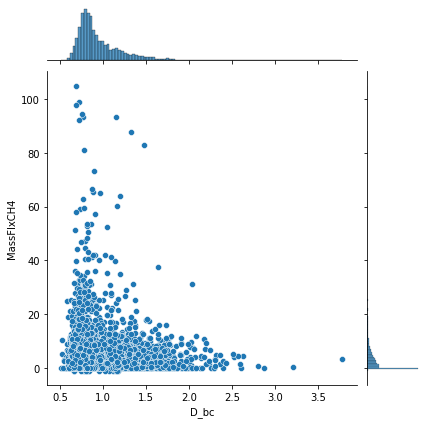

In [ ]:
## plot D_bc

# plt.scatter(np.log10(gdf.D_bc), gdf.MassFlxCH4)
sns.jointplot(data=gdf, x="D_bc", y="MassFlxCH4")

In [ ]:
## save to table

table = pd.DataFrame(columns=('adj_r2', 'aic', 'n', 'cond_no'))

## loop
for i, model in enumerate((model1, model2, model3, model4)):
  # table.iloc[i, 'adj_r2'] = model.rsquared_adj
  table = table.append({'adj_r2': model.rsquared_adj, 'aic': model.aic, 'n': model.nobs, 'cond_no':model.condition_number}, ignore_index=True)

## Add notes
table['Model'] = ['area and buffer percent', 'buffer percent', 'P:A ratio', 'area']

## view
table

,adj_r2,aic,n,cond_no,Model
0,0.222700,18385.483787,5128.0,168.938004,area and buffer percent
1,0.215976,18428.657295,5128.0,36.617906,buffer percent
2,0.227994,18349.439714,5128.0,15.184218,P:A ratio
3,0.222280,18387.253398,5128.0,5.531671,area


.: The new buffer method performs as well as  the original LBF buffer method. Here, area does slightly better than the new buffer method.

In [ ]:
## Save new dataset as shp

gdf.to_file('/content/SAR_ebulition_metrics.shp')

In [ ]:
%%bash
# zip files
zip /content/SAR_ebulition_metrics.zip /content/SAR*

  adding: content/SAR_ebulition_metrics.cpg (stored 0%)
  adding: content/SAR_ebulition_metrics.dbf (deflated 88%)
  adding: content/SAR_ebulition_metrics.prj (deflated 42%)
  adding: content/SAR_ebulition_metrics.shp (deflated 25%)
  adding: content/SAR_ebulition_metrics.shx (deflated 37%)


## Scrap

In [ ]:
## Load shapefile with ogr, bc geopandas is not installed in colab
shp_pth = '/content/drive/Othercomputers/My Computer (1)/F:/EngramAboveSAR_Methane_Ebullition_AK_1790/SAR_Methane_Ebullition_AK_1790/edk_out/SAR_ebulition_cmb_b100_biali.shp'
driver = ogr.GetDriverByName('ESRI Shapefile')
dataSource = driver.Open(shp_pth, 0) # 0 means read-only. 1 means writeable.
layer = dataSource.GetLayer()